In [12]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as pl

In [2]:
df = pd.read_csv("Company_Data.csv")

In [3]:
print("Dataset Preview:")
print(df.head())
print("\nColumn names:", df.columns)

Dataset Preview:
   Sales  CompPrice  Income  Advertising  Population  Price ShelveLoc  Age  \
0   9.50        138      73           11         276    120       Bad   42   
1  11.22        111      48           16         260     83      Good   65   
2  10.06        113      35           10         269     80    Medium   59   
3   7.40        117     100            4         466     97    Medium   55   
4   4.15        141      64            3         340    128       Bad   38   

   Education Urban   US  
0         17   Yes  Yes  
1         10   Yes  Yes  
2         12   Yes  Yes  
3         14   Yes  Yes  
4         13   Yes   No  

Column names: Index(['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US'],
      dtype='object')


In [4]:
df['Sales_Category'] = pd.cut(df['Sales'],
                              bins=[0, 5, 10, 20],
                              labels=['Low', 'Medium', 'High'])

In [5]:
df = df.drop('Sales', axis=1)

In [6]:
df_encoded = pd.get_dummies(df, drop_first=True)


In [7]:
X = df_encoded.drop('Sales_Category_High', axis=1, errors='ignore')
y = df_encoded['Sales_Category_High']


In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [9]:
model = DecisionTreeClassifier(criterion='entropy', random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [10]:
y_pred = model.predict(X_test)
print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))



Accuracy: 0.9666666666666667

Classification Report:
               precision    recall  f1-score   support

       False       0.98      0.98      0.98        96
        True       0.92      0.92      0.92        24

    accuracy                           0.97       120
   macro avg       0.95      0.95      0.95       120
weighted avg       0.97      0.97      0.97       120



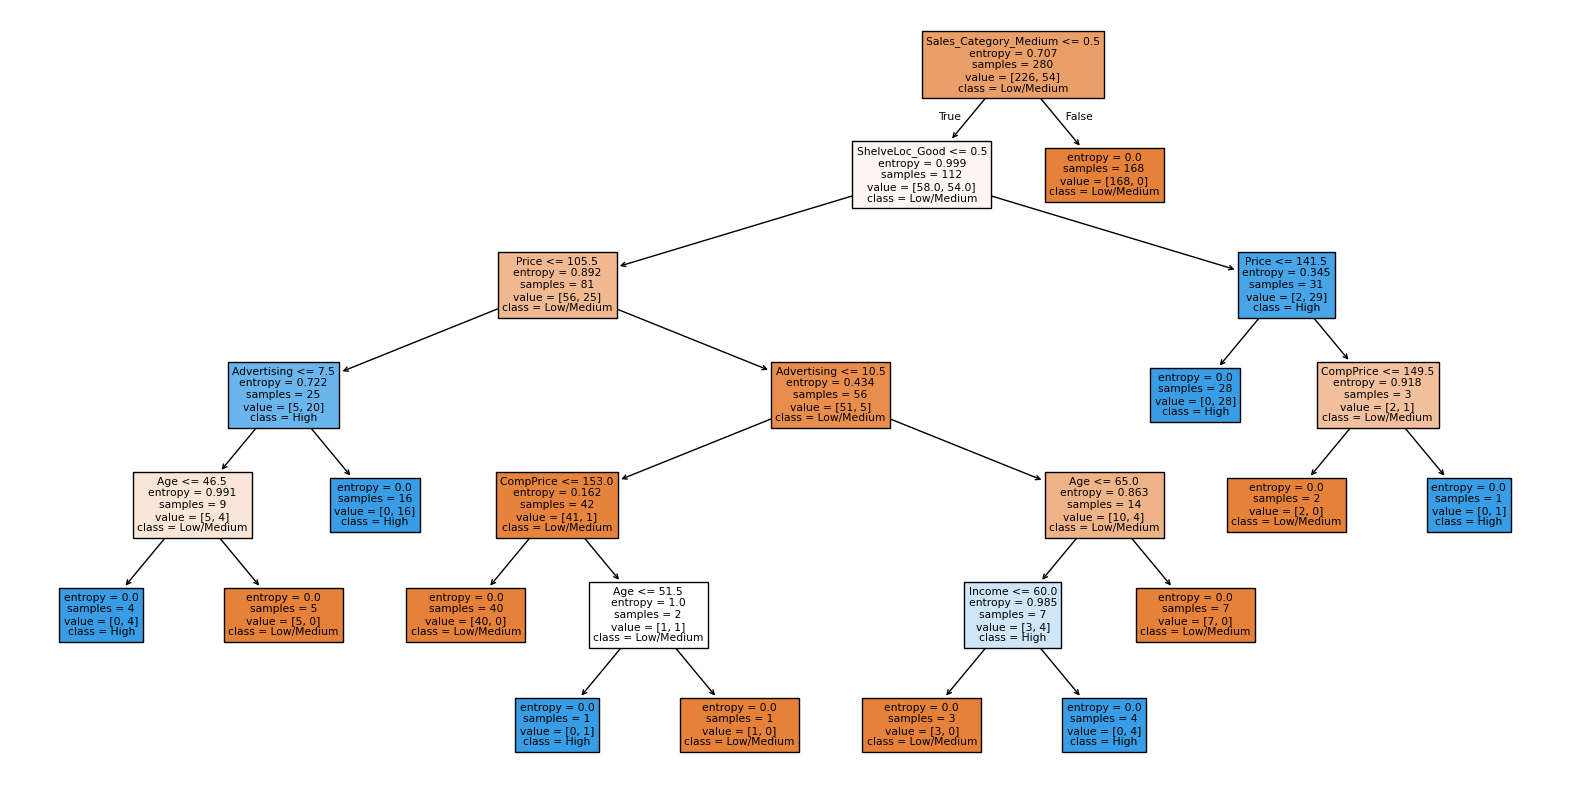

In [13]:
plt.figure(figsize=(20,10))
plot_tree(model, feature_names=X.columns, class_names=['Low/Medium', 'High'], filled=True)
plt.show()